### Monte Carlo Modeling

http://www.analyzemath.com/statistics/probability_questions.html

In [95]:
import numpy as np
from scipy.stats import binom, itemfreq
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Monte Carlo simulation involves using randomness and iteration to replicate some process.  We've seen many random number generators before.

In [ ]:
# Play along!
# In what ways have we already generated random numbers in this course?

In [ ]:
One way to get a handle on what Monte Carlo is all about is to simulate some things we already know:

## Simple calculations

In [2]:
# What percentage of the numbers between 1 and 100 are greater than 55?

# This is directly answerable:
len(np.arange(56,101)) / len(np.arange(1,101))

0.45

In [491]:
# But we could also simulate this:
k = 100
x = np.random.randint(1,101,k)
np.sum(x > 55) / k

0.46000000000000002

In [ ]:
# Play along!  Simulate rolling a six-sided die 100 times.  How many times did you get an even number?

In [ ]:
# Play along!  Using Monte Carlo, solve:
# Two coins are tossed, find the probability that two heads are obtained. 

In [ ]:
# Play along!
# Two dice are rolled, find the probability that the sum is between 3 and 11 (inclusive)

## With means and standard deviations

In [6]:
# For easy problems, we might just run the direct calculations, but when the situation gets even a little messy, randomness 
# can be very effective.

# I have a sample of 10,000 rats with a mean weight of 230 grams (SD = 25).  What percentage of my rats are above 250 grams?

k = 10000
x = np.random.normal(loc=230,scale=25,size=k)
np.sum(x>250) / k

0.21299999999999999

In [7]:
# I have invented a growth serum that boosts rat weight by M=15.5, SD=22.12
# Give the growth serum to the rats!  (Muhahaha!) and tell me how many are over 250 grams?

k = 10000
rats = np.random.normal(loc=230,scale=25,size=k)
serum = np.random.normal(15.5,12.12,k)
rats = rats + serum
np.sum(rats>250) / k

0.43380000000000002

In [20]:
# These rats are too expensive!  Experiment with k to find out the minimum you think I neeed before the output gets unreliable.
# You'll need to repeat each observations a few times and watch the output to be sure.

k = 50  # Adjust this number at look at the result.  How many rats do I need for a stable, reliable result?
rats = np.random.normal(loc=230,scale=25,size=k)
serum = np.random.normal(15.5,12.12,k)
rats = rats + serum
np.sum(rats>250) / k

# Play along!  Write your answer here, along with a justification.

0.44

## random.choice

In [30]:
# One of the nice ways to simulate a random process is with random.choice:

# This will randomly select one of these in the list.  Rerun it to see!

np.random.choice(['Fred','Velma','Shaggy','Scooby','Daphne'])

'Shaggy'

In [32]:
# You can select multiple people:

selection = np.random.choice(['Fred','Velma','Shaggy','Scooby','Daphne'],size=3)
print(selection)

['Shaggy' 'Daphne' 'Daphne']


In [44]:
# You can select multiple people, and you can indicate whether you want to replace (to avoid duplicates)

selection = np.random.choice(['Fred','Velma','Shaggy','Scooby','Daphne'],size=3,replace=False)
print(selection)

['Daphne' 'Velman' 'Shaggy']


In [45]:
# If you aren't replacing, you can't pick a sample larger than the length of your list.
selection = np.random.choice(['Fred','Velman','Shaggy','Scooby','Daphne'],size=6,replace=False)
print(selection)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [530]:
# Simulate a deck of cards:

suit = ['Clubs','Spades','Diamonds','Hearts']
value = list('23456789')
value.extend(['10','Jack','Queen','King','Ace'])
draw = (np.random.choice(value),np.random.choice(suit))
print('You just drew the',draw[0],'of',draw[1],'.')

You just drew the 2 of Hearts .


In [531]:
# Let's simulate the WHOLE deck using a Pandas Dataframe and np.tile

values = np.tile(value,(4,1))
print(values)

[['2' '3' '4' '5' '6' '7' '8' '9' '10' 'Jack' 'Queen' 'King' 'Ace']
 ['2' '3' '4' '5' '6' '7' '8' '9' '10' 'Jack' 'Queen' 'King' 'Ace']
 ['2' '3' '4' '5' '6' '7' '8' '9' '10' 'Jack' 'Queen' 'King' 'Ace']
 ['2' '3' '4' '5' '6' '7' '8' '9' '10' 'Jack' 'Queen' 'King' 'Ace']]


In [532]:
suits = np.tile(suit,(13,1))
print(suits)

[['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']
 ['Clubs' 'Spades' 'Diamonds' 'Hearts']]


In [533]:
print(np.shape(values))
print(np.shape(suits))

# Play along!  Given this information, how can we put our suits and values together?

(4, 13)
(13, 4)


In [119]:
print(values.T.flatten())
print(suits.flatten())

['2' '2' '2' '2' '3' '3' '3' '3' '4' '4' '4' '4' '5' '5' '5' '5' '6' '6'
 '6' '6' '7' '7' '7' '7' '8' '8' '8' '8' '9' '9' '9' '9' '10' '10' '10'
 '10' 'Jack' 'Jack' 'Jack' 'Jack' 'Queen' 'Queen' 'Queen' 'Queen' 'King'
 'King' 'King' 'King' 'Ace' 'Ace' 'Ace' 'Ace']
['Clubs' 'Spades' 'Diamonds' 'Hearts' 'Clubs' 'Spades' 'Diamonds' 'Hearts'
 'Clubs' 'Spades' 'Diamonds' 'Hearts' 'Clubs' 'Spades' 'Diamonds' 'Hearts'
 'Clubs' 'Spades' 'Diamonds' 'Hearts' 'Clubs' 'Spades' 'Diamonds' 'Hearts'
 'Clubs' 'Spades' 'Diamonds' 'Hearts' 'Clubs' 'Spades' 'Diamonds' 'Hearts'
 'Clubs' 'Spades' 'Diamonds' 'Hearts' 'Clubs' 'Spades' 'Diamonds' 'Hearts'
 'Clubs' 'Spades' 'Diamonds' 'Hearts' 'Clubs' 'Spades' 'Diamonds' 'Hearts'
 'Clubs' 'Spades' 'Diamonds' 'Hearts']


In [120]:
deck = pd.DataFrame({'suit':suits.flatten(),'value':values.flatten()})
print(deck)

        suit  value
0      Clubs      2
1     Spades      3
2   Diamonds      4
3     Hearts      5
4      Clubs      6
5     Spades      7
6   Diamonds      8
7     Hearts      9
8      Clubs     10
9     Spades   Jack
10  Diamonds  Queen
11    Hearts   King
12     Clubs    Ace
13    Spades      2
14  Diamonds      3
15    Hearts      4
16     Clubs      5
17    Spades      6
18  Diamonds      7
19    Hearts      8
20     Clubs      9
21    Spades     10
22  Diamonds   Jack
23    Hearts  Queen
24     Clubs   King
25    Spades    Ace
26  Diamonds      2
27    Hearts      3
28     Clubs      4
29    Spades      5
30  Diamonds      6
31    Hearts      7
32     Clubs      8
33    Spades      9
34  Diamonds     10
35    Hearts   Jack
36     Clubs  Queen
37    Spades   King
38  Diamonds    Ace
39    Hearts      2
40     Clubs      3
41    Spades      4
42  Diamonds      5
43    Hearts      6
44     Clubs      7
45    Spades      8
46  Diamonds      9
47    Hearts     10
48     Clubs   Jack


In [106]:
# Play along!  Write out that deck for future use.


In [121]:
# Lets add some attribute data to our deck:

deck['color'] = 'black'
deck.loc[(deck.suit=='Diamonds') | (deck.suit=='Hearts'),'color'] = 'red'
deck.head()

,suit,value,color
0,Clubs,2,black
1,Spades,3,black
2,Diamonds,4,red
3,Hearts,5,red
4,Clubs,6,black


In [140]:
# Let's draw a card!

deck.sample()

,suit,value,color
41,Spades,4,black


In [144]:
# Draw 10,000 cards!  Replacement is set to False by default in a dataframe

k = 10000
my_sample = deck.sample(k,replace=True)
my_sample.head()

,suit,value,color
37,Spades,King,black
0,Clubs,2,black
2,Diamonds,4,red
47,Hearts,10,red
8,Clubs,10,black


In [ ]:
# Play along!  How many times did you draw a black card?

In [ ]:
# Play along!  How many times did you draw the 3 of diamonds?  How many would you expect?

In [149]:
# Play along! How many queens did you get?

## Replacement

In [154]:
# Suppose we wanted to investigate the odd of getting a flush in poker:

hand = deck.sample(5,replace=False)
print(hand)

        suit  value  color
14  Diamonds      3    red
8      Clubs     10  black
49    Spades  Queen  black
26  Diamonds      2    red
0      Clubs      2  black


In [153]:
# How would I know if I had a flush?  I can use the "unique" method to see if I have just one suit:

hand['suit'].unique()

array(['Diamonds', 'Hearts', 'Spades'], dtype=object)

In [155]:
# Or I could use value_counts to get the number:

hand['suit'].value_counts()

Diamonds    2
Clubs       2
Spades      1
Name: suit, dtype: int64

In [167]:
# On this first, cut, imagaine we just want to see if we got a flush or not:

hand = deck.sample(5,replace=False)
len(hand['suit'].unique()) == 1

False

In [169]:
# We COULD simulate this with a loop:

k = 10000
is_a_flush = np.zeros(k)
for i in range(k):
    hand = deck.sample(5,replace=False)
    is_a_flush[i] = len(hand['suit'].unique()) == 1
np.sum(is_a_flush)

18.0

In [ ]:
# But you might notice this takes a while!
# Play along!  How long does it take?  

In [407]:
# We could also imagine our deck of cards as numbers from 0 to 51
idx = np.arange(52)

# And then we could shuffle that:
np.random.shuffle(idx)

# And see that the "deck" has been shuffled.
print(idx)

# We can recover our shuffled deck from pandas this way:
deck.loc[idx]

[ 6  7 12 51 19 45  0 23 44 15  2  3 47 42 38 26 37 40 46 11 21 31 39 33 50
 20 24  5 49 18 36 35 13 32 30 28 14 41 48 17 16 29  9  8 22  1 43 10 25 27
  4 34]


,suit,value,color
6,Diamonds,8,red
7,Hearts,9,red
12,Clubs,Ace,black
51,Hearts,Ace,red
19,Hearts,8,red
45,Spades,8,black
0,Clubs,2,black
23,Hearts,Queen,red
44,Clubs,7,black
15,Hearts,4,red


In [420]:
# If we only wanted the first 5 cards as our "hand" we could do this:

# Our population is the 52 cards (0 to 51) and we're asking for 5 of them.
idx = np.random.choice(52,5,replace=False)
hand= deck.loc[idx]
print(hand)

        suit  value  color
34  Diamonds     10    red
45    Spades      8  black
51    Hearts    Ace    red
26  Diamonds      2    red
49    Spades  Queen  black


In [421]:
# We could also only pay attention to the suit information:

idx = np.random.choice(52,5,replace=False)
my_suits = deck.loc[idx,'suit']
print(my_suits)


49      Spades
30    Diamonds
45      Spades
27      Hearts
37      Spades
Name: suit, dtype: object


In [423]:
# Solving this with idx-based methods:
k = 10000
is_a_flush = np.zeros(k)
for i in range(k):
    idx = np.random.choice(52,5,replace=False)
    hand= deck.loc[idx]
np.sum(is_a_flush)

15.0

In [ ]:
# Play along!  Can you figure out how to discard the cards that aren't a flush (up to three), and draw three new cards?
# What's the probability of getting a flush if you can discard up to three cards? (this is a hard one!)

## Simulating a process.  REAL shuffling.

Shuffling a deck of cards involves splitting the deck into two piles, and then having cards drop, more or less randomly, from either pile.  Here, I split the piles according to the binomial distribution, and then choose a card from one pile or the other proportionally based on its height (i.e., the number of cards in it).

Further Reading:
https://github.com/thomaspingel/riffle-shuffle/blob/master/A%20Quick%20Look%20at%20Shuffling.ipynb


In [2]:
def riffle(deck,n_times=1):
    
    n_cards = deck.size
    
    for j in range(n_times):
        # Split the deck into two piles (left and right) according to the binomial distribution at position "pos"
        pos = binom(n_cards,.5).rvs(1)[0]
        left, right = deck[:pos].copy(), deck[pos:].copy()
        
        # Initialize the deck.  Cards will be placed back here.
        deck[:] = -1

        # The probability of grabbing the card from left or right
        # is proportional to the size of that pile
        for i in range(n_cards):
            p = np.random.rand()
            thresh = left.size / (left.size + right.size)
            if p < thresh:
                deck[i] = left[0]
                left = np.delete(left,0)
            else:
                deck[i] = right[0]
                right = np.delete(right,0)

In [3]:
# Simulate one shuffle

deck = np.arange(52)
riffle(deck)
print(deck)

[ 0 23 24  1 25 26 27 28 29  2 30  3 31  4 32 33 34 35  5  6  7  8  9 10 11
 36 37 12 38 39 40 41 13 42 14 15 43 44 16 45 17 46 47 18 48 49 50 19 20 21
 22 51]


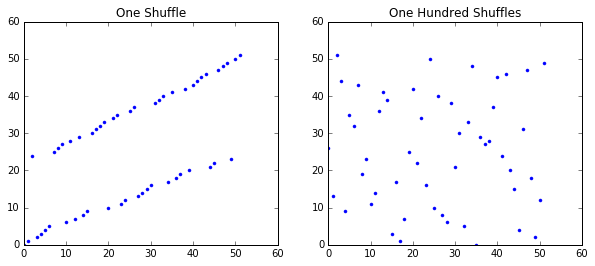

In [58]:
# And visualize the "rising sequences" in the shuffled deck as an visual indicator of randomness.  An unshuffled deck would be 
# one continuous rising sequence, and a well shuffled deck would appear like random dots (the starting position is unrelated)
# to the ending position.

fix, ax = plt.subplots(figsize=(10,4))
plt.subplot(121)
deck = np.arange(52)
riffle(deck)
plt.plot(deck,'.')
plt.title('One Shuffle')

plt.subplot(122)
deck = np.arange(52)
riffle(deck,100)
plt.plot(deck,'.')
plt.title('One Hundred Shuffles')

In [59]:
# Next, we'll run a simulation look at where the top card ends up.  On a well-shuffled deck, the top card
# should be equally likely to appear anywhere.  We'll use numpy's "where" to find out where it landed.

# Rerun this code block to see where the top card ends up with different shuffles.

deck = np.arange(52)
riffle(deck)
print(deck)
np.where(deck==0)

[ 0  1  2  3 27 28  4 29  5 30  6 31 32 33  7 34 35 36 37  8 38 39 40  9 41
 10 42 43 11 44 12 13 14 15 16 17 18 19 45 46 20 47 48 21 22 23 24 49 50 25
 51 26]


(array([0], dtype=int64),)

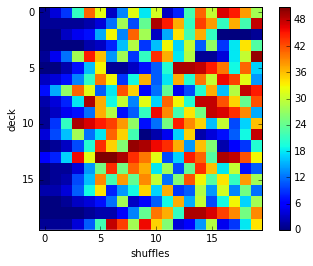

In [60]:
# Run a simulation of twenty decks, shuffled 20 times each and tracking where the top card ended up.
# In a well-shuffled deck, the top card should be equally likely to appear anywhere.

n_shuffles = 20
n_decks = 20
top_card = 255*np.ones((n_decks,n_shuffles),dtype=np.uint8)
for i in range(n_decks):
    deck = np.arange(52)
    for j in range(n_shuffles):
        riffle(deck)
        top_card[i,j] = np.where(deck==0)[0]
        
# Visualize the results.  Notice most of the time at the beginning, the top card ends up near the top (position 0),
# but with enough shuffles, it's essentially random.
plt.imshow(top_card,interpolation="none")
plt.xlabel('shuffles')
plt.ylabel('deck')
plt.colorbar()

Finally, we can track the overall distribution of of top cards over many, many shuffles.  Think of this like the image above, but where the number of decks is much larger (say, 1000).

In [61]:
n_shuffles = 16
n_decks = 1000
top_card = 255*np.ones((n_decks,n_shuffles),dtype=np.uint8)
for i in range(n_decks):
    deck = np.arange(52)
    for j in range(n_shuffles):
        riffle(deck)
        top_card[i,j] = np.where(deck==0)[0]

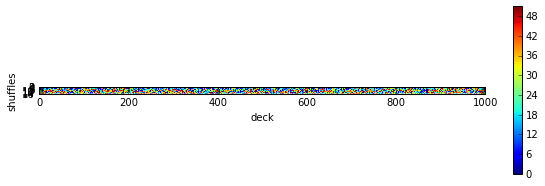

In [63]:
# Visualize the results; we'll turn it on its side.
fig, ax = plt.subplots(figsize=(10,3))
plt.imshow(top_card.T,interpolation="none")
plt.xlabel('deck')
plt.ylabel('shuffles')
plt.colorbar()

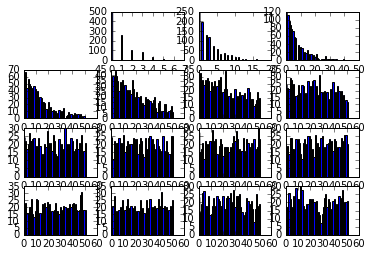

In [64]:
# To see the pattern, we'll construct a histogram for each shuffle, so we can track the likelihood of where
# the top card ends up after each shuffle.

for i in range(15):
    plt.subplot(4,4,i+2)
    plt.hist(top_card[:,i],bins=52)
plt.show()

While at the first shuffle, it's by far more common for the card to end up in positions 0 to 7.  Even after 3-4 shuffles, it's far more likely that the original top card will be near the top.  But by about the 7th shuffle, there's a good chance it'll end up anywhere.  Shuffling 8-16 times doesn't seem to add that much value.